In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Batido en promedio 50Hz

In [11]:

def simulate_averaging (frequency_line=50, samples=100, frequency_trigger=1/3, Window=50, Number_milliseconds=1E6, randomize_trigger=False):

    # Calculate values for later
    angular_frequency = 2 * math.pi * frequency_line
    Time_values = list(range(int(Number_milliseconds)))
    random_values = np.random.rand(samples)
    Voltage_values = []
    for timestamp in Time_values:
        Voltage_values.append(math.sin( angular_frequency * timestamp / 1E3))
    
    # Record averages and their maximum amplitudes
    Samples = []
    Averages = []
    Amplitudes = []

    # Initialize average to first value
    sample_number = 1
    average = Voltage_values[0:Window]
    Averages.append(average)

    # Compute all samples and average them
    for sample_number in range(1, samples):

        # Compute the timestamp when we will trigger
        if not randomize_trigger:
            trigger_timestamp = sample_number * (1/frequency_trigger)

        else:
            trigger_timestamp = (random_values[sample_number]) * sample_number * (1/frequency_trigger)


        # Compute and compile one sample for every successive trigger
        sample = Voltage_values[int(trigger_timestamp):int(trigger_timestamp + Window)]
        Samples.append(sample)

        # Compute the average at the time of that sample
        average = list(np.zeros_like(average))
        for index in range(0, len(Samples[0])):
            for sample in Samples:
                average[index] = average[index] + sample[index]
            
            average[index] = average[index] / sample_number

        Averages.append(average)

        # Record amplitude
        Amplitudes.append(max(average))

    return Averages, Amplitudes


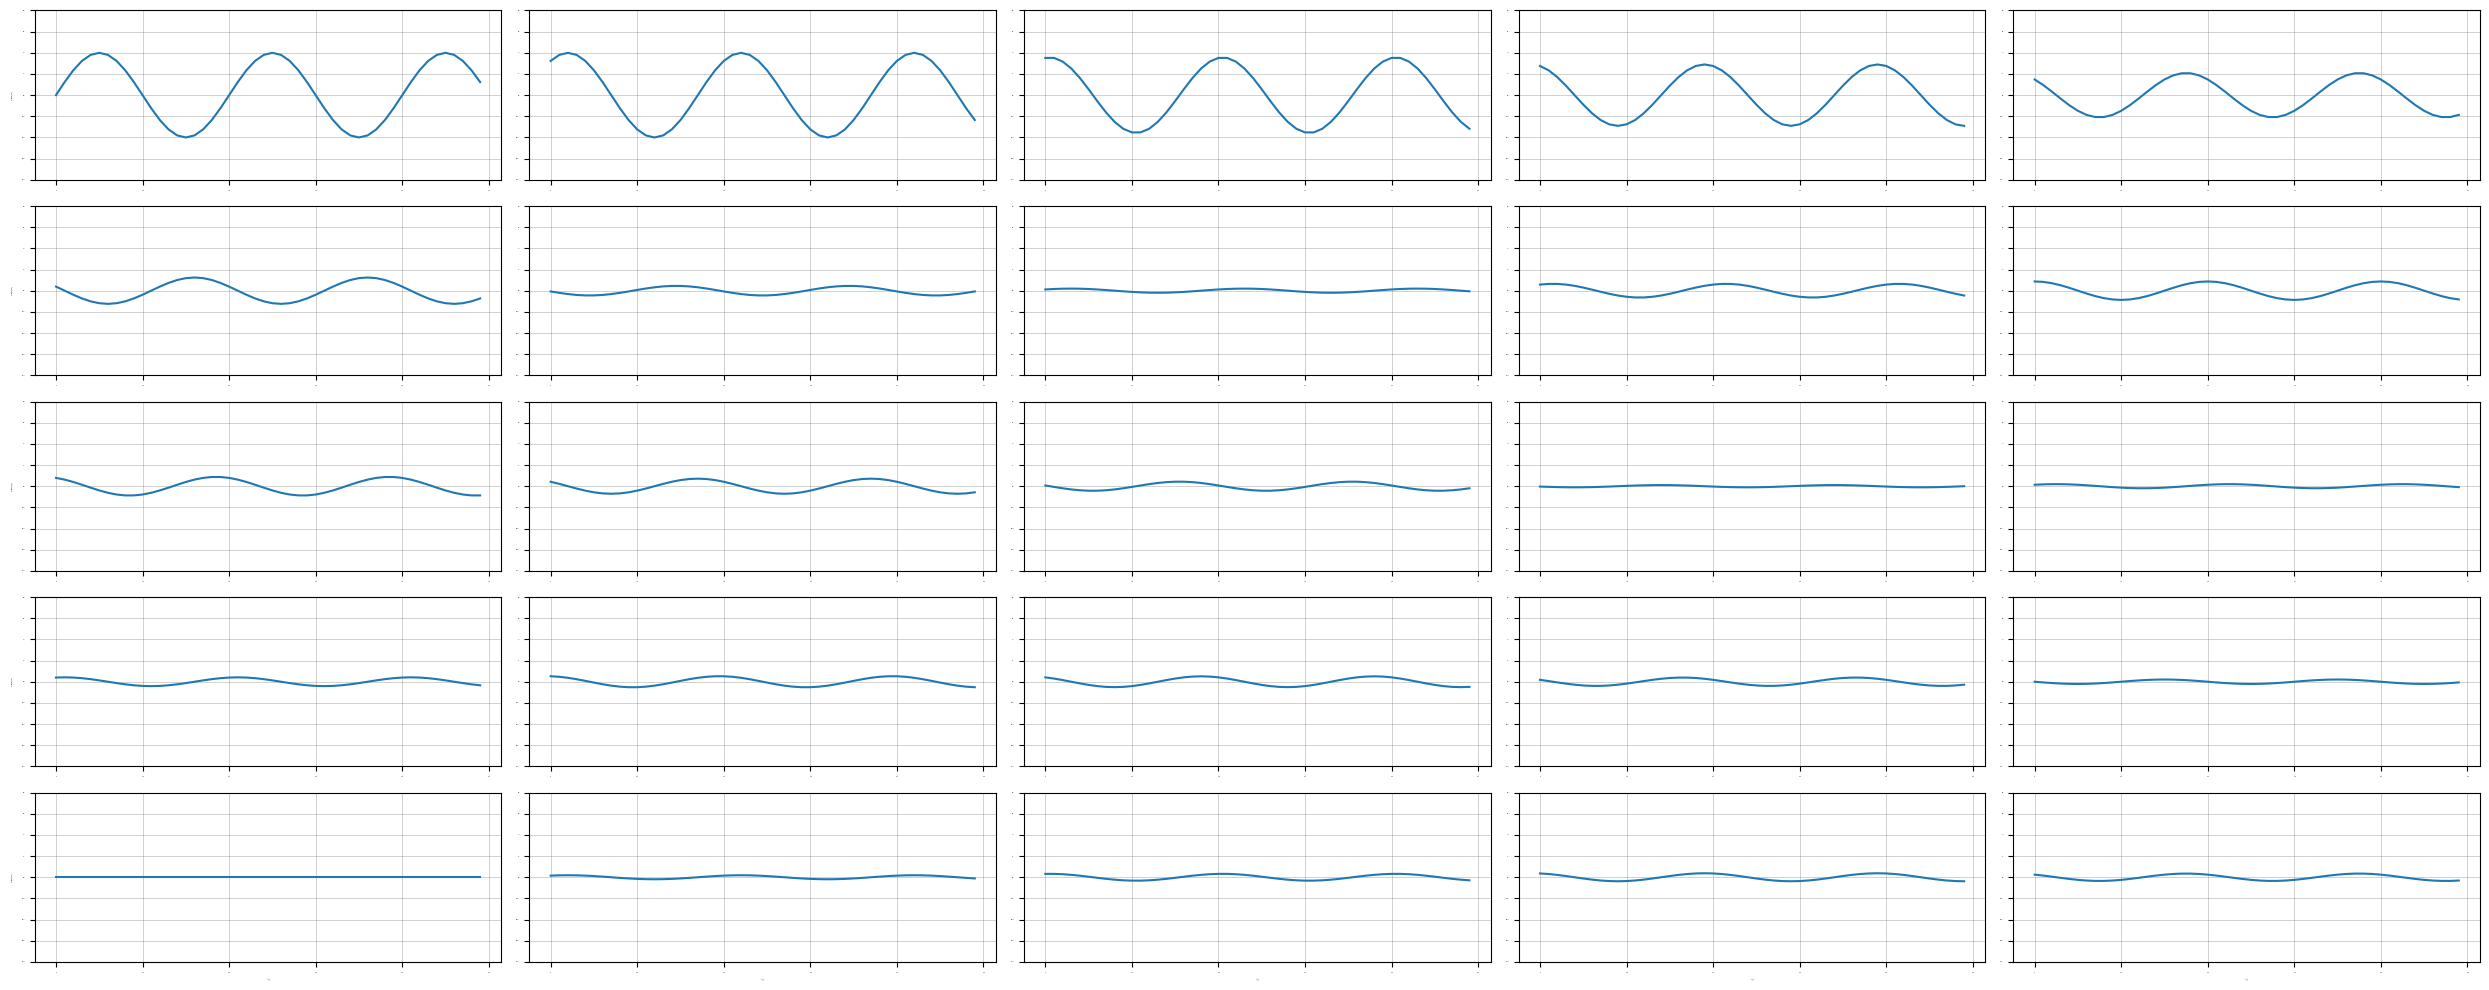

In [16]:

Averages, Amplitudes = simulate_averaging (frequency_line=50, samples=100, frequency_trigger=1/3, Window=50, 
                                           Number_milliseconds=1E6, randomize_trigger=False)


# Create a 3x3 grid of subplots
Rows = 5
Cols = 5

fig, axs = plt.subplots(Rows, Cols, figsize=(25, 10))

Font_Size = 1

# Set the main title for the entire figure
# fig.suptitle(f'{subfolder_name}'+'\nSearch: '+method, fontsize=Font_Size+4)


# Iterate through the subplots plotting in each of them a new average
index = 0
for row in range(Rows):
    for col in range(Cols):

        ax = axs[row, col]

        ax.plot(range(0, len(Averages[index])), Averages[index])
        ax.set_ylim([-2, 2])

        index = index + 1


        # Only label y axis on left most graphs
        if (col==0):
            ax.set_ylabel(r'$Voltage$ [a.u.]', fontsize=Font_Size)

        # Only label x axis on lower graphs
        if (row==Rows-1):
            ax.set_xlabel('t [s]', fontsize=Font_Size)

        
        # Graphs should be limited to the same axis
        
        # Gridlines
        ax.grid(True, linewidth=0.5, color='gray', alpha=0.5)
        #ax.set_xticks(range(0, end_tmstmp, 60*60))

        # Set font size of y-axis ticks
        ax.tick_params(axis='x', labelsize=Font_Size-4)
        ax.tick_params(axis='y', labelsize=Font_Size-4)

# Adjust spacing between subplots
plt.tight_layout()            

# Show the plot
plt.show()

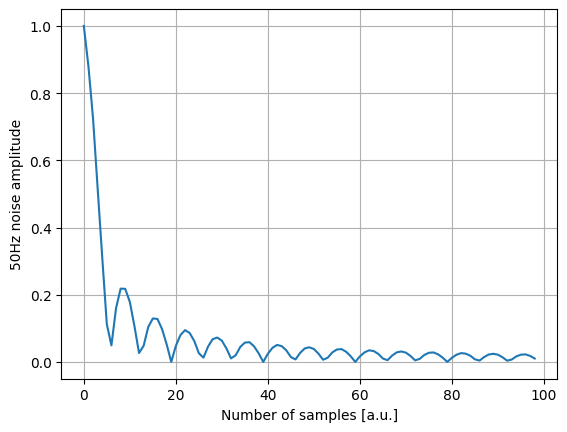

In [17]:
# Create a new figure
fig = plt.figure()

# Add a subplot
ax = fig.add_subplot(111)

# Plot the data
ax.plot(range(0, len(Amplitudes)), Amplitudes)
#ax.set_ylim(0, 1E-1)

# Customize the plot
ax.set_xlabel('Number of samples [a.u.]')
ax.set_ylabel('50Hz noise amplitude')
ax.grid()


# Display the figure
plt.show()

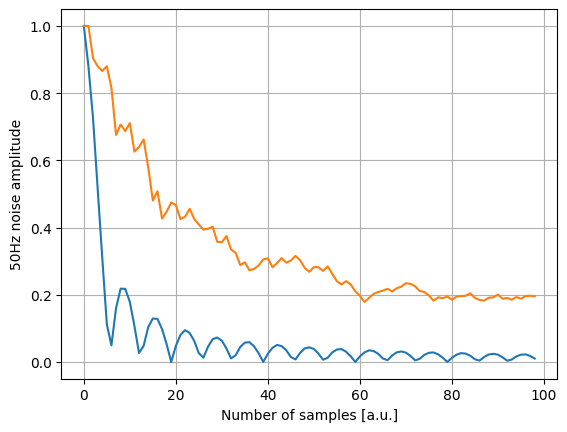

In [19]:
Averages_random_trig, Amplitudes_random_trig = simulate_averaging (frequency_line=50, samples=100, frequency_trigger=1/3, Window=50, 
                                           Number_milliseconds=1E6, randomize_trigger=True)


# Create a new figure
fig = plt.figure()

# Add a subplot
ax = fig.add_subplot(111)

# Plot the data
ax.plot(range(0, len(Amplitudes)), Amplitudes)
ax.plot(range(0, len(Amplitudes_random_trig)), Amplitudes_random_trig)
#ax.set_ylim(0, 1E-1)

# Customize the plot
ax.set_xlabel('Number of samples [a.u.]')
ax.set_ylabel('50Hz noise amplitude')
ax.grid()


# Display the figure
plt.show()